# Geopandas for spatial analysis

## Task 1: given a list of points, compute and plot the convex hull of these points

In [5]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# generate sample points
gdf_polys = gpd.read_file(gpd.datasets.get_path('nybb'))
# find the bounds of your geodataframe
x_min, y_min, x_max, y_max = gdf_polys.total_bounds

# set sample size
n = 100
# generate random data within the bounds
x = np.random.uniform(x_min, x_max, n)
y = np.random.uniform(y_min, y_max, n)

# convert them to a points GeoSeries
gdf_points = gpd.GeoSeries(gpd.points_from_xy(x, y))

# only keep those points within polygons
gdf_points = gdf_points[gdf_points.within(gdf_polys.unary_union)]

<AxesSubplot:>

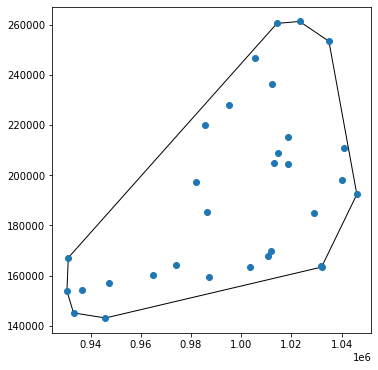

In [7]:
# compute the convex_hull
# 1) Transfrom the geometry to GeoSereis
# 2) Using unary_union to combine multiple rows into one
# 3) Using convex_hull function
convex_hull = gpd.GeoSeries(gdf_points.geometry).unary_union.convex_hull

fig, ax = plt.subplots(figsize=(6, 6))
gpd.GeoSeries(convex_hull).plot(ax = ax, facecolor="none", edgecolor="black")
# add the points
gdf_points.plot(ax=ax)

# Mappping

References:
- [Setting axis square](http://darribas.org/gds19/content/labs/lab_03.html)
- [Adding text labels to a map](https://shotlefttodatascience.com/2018/05/16/adding-labels-to-districts-in-geopandas/)